# `Time Series Analysis`

### Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types

`1. Time series data` : A set of observations on the values that a variable takes at different times.

`2. Cross-sectional data` : Data of one or more variables, collected at the same point in time.

`3. Pooled data`: A combination of time series data and cross-sectional data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

Get data from this link [data](https://finance.yahoo.com/quote/%5EGSPC/history?ltr=1)

In [2]:
df = pd.read_csv("GSPC.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1954-09-14,31.280001,31.280001,31.280001,31.280001,31.280001,2120000
1,1954-09-15,31.290001,31.290001,31.290001,31.290001,31.290001,2110000
2,1954-09-16,31.459999,31.459999,31.459999,31.459999,31.459999,1880000
3,1954-09-17,31.709999,31.709999,31.709999,31.709999,31.709999,2250000
4,1954-09-20,31.570000,31.570000,31.570000,31.570000,31.570000,2060000


__Lets see dtypes of the Dataframe using__ `dataframe.dtypes`

In [4]:
df.dtypes.to_frame()

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


__1. lets convert Date column to datetime dtype__

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

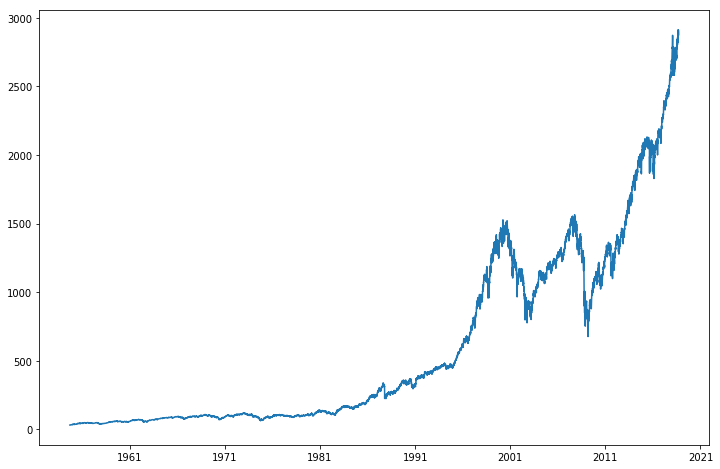

In [6]:
plt.figure(figsize=(12, 8))
plt.plot_date(x = df.Date, y=df.Close,fmt="-")
plt.show()

**The first obvious thing to note, aside from the two giant dips at the tail end corresponding to the market crashes in 2018-02,2018-4 etc, is that the data is clearly non-stationary. This makes sense for market data as it tends to go up in the long run more than it goes down. This is a problem for time series analysis though as non-stationary data is hard to reason about. The first thing we can try is a first difference of the series. In other words, subtract the previous value t-1 from the current value t to get the difference d(t).**

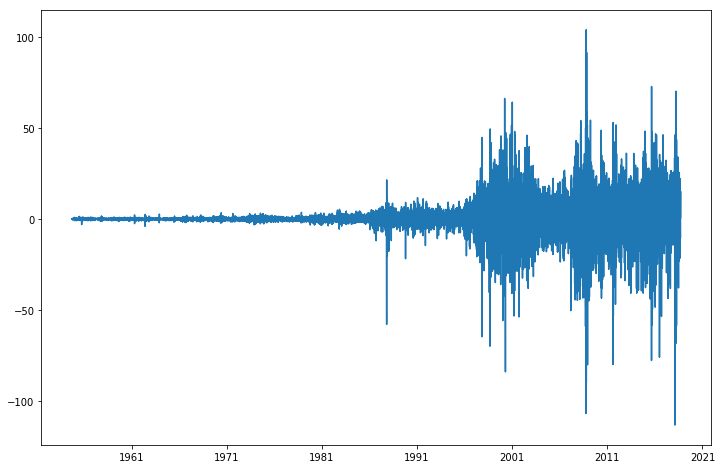

In [7]:
df['1st_difference'] = df['Close'] - df['Close'].shift()  
plt.figure(figsize=(12, 8))
plt.plot_date(x = df.Date, y=df["1st_difference"],fmt="-")
plt.show()

**The data no longer appears to be trending up over time and is instead centered around 0. There's another problem though. Look at the variance. It's very small early on and steadily increases over time. This is a sign that the data is not only non-stationary but also exponentially increasing.To deal with this, we'll apply a log transform to the original series.**


In [8]:
df['Log_Transform'] = df['Close'].apply(lambda x: np.log(x))    

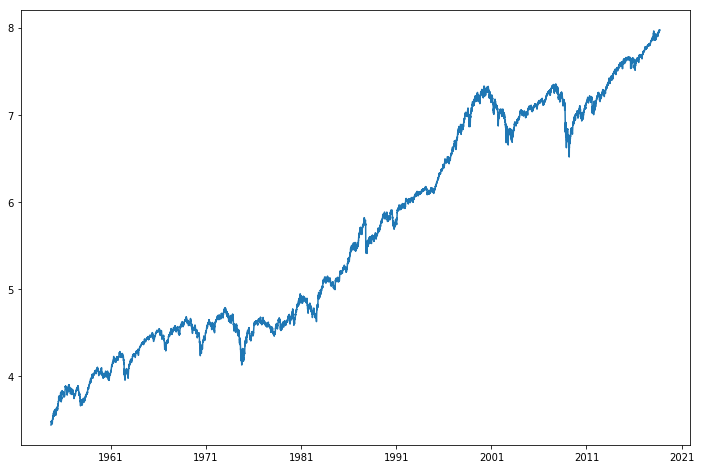

In [9]:
plt.figure(figsize=(12, 8))
plt.plot_date(x = df.Date, y=df.Log_Transform,fmt="-")
plt.show()

__So that gives us the original closing price with a log transform applied to "flatten" the data from an exponential curve to a linear curve.__

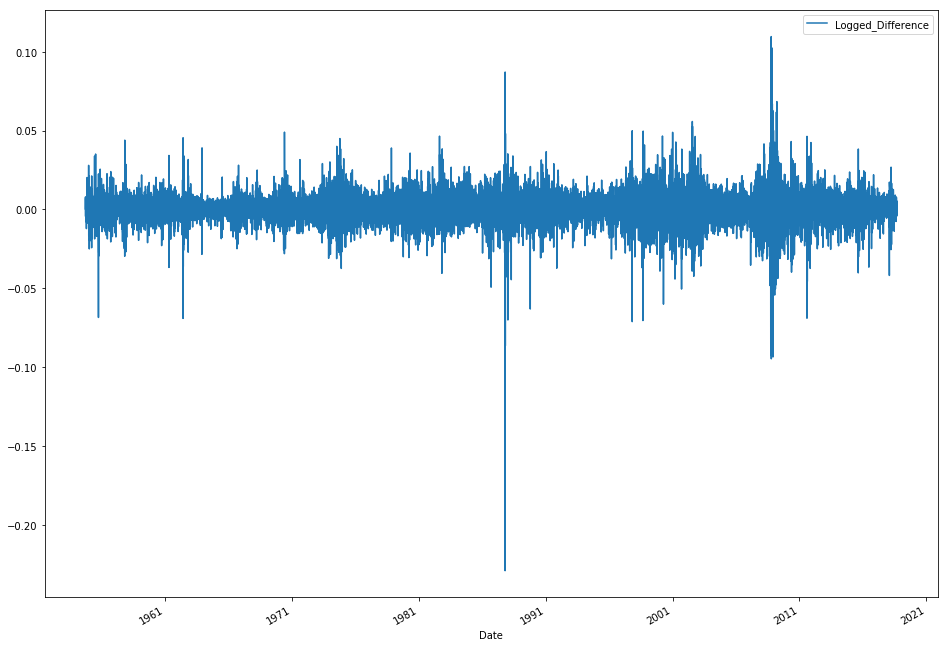

In [10]:
df['Logged_Difference'] = df['Log_Transform'] - df['Log_Transform'].shift()  
df.plot(x = "Date",y = "Logged_Difference", figsize=(16, 12))
plt.show()

__Much better! We now have a stationary time series model of daily changes__

Now let's create some lag variables y(t-1), y(t-2) etc. and examine their relationship to y(t). We'll look at 1 and 2-day lags along with weekly and monthly lags to look for "seasonal" effects.

In [11]:
df['Lag_1'] = df['Logged_Difference'].shift()  
df['Lag_2'] = df['Logged_Difference'].shift(2)  
df['Lag_5'] = df['Logged_Difference'].shift(5)  
df['Lag_30'] = df['Logged_Difference'].shift(30)

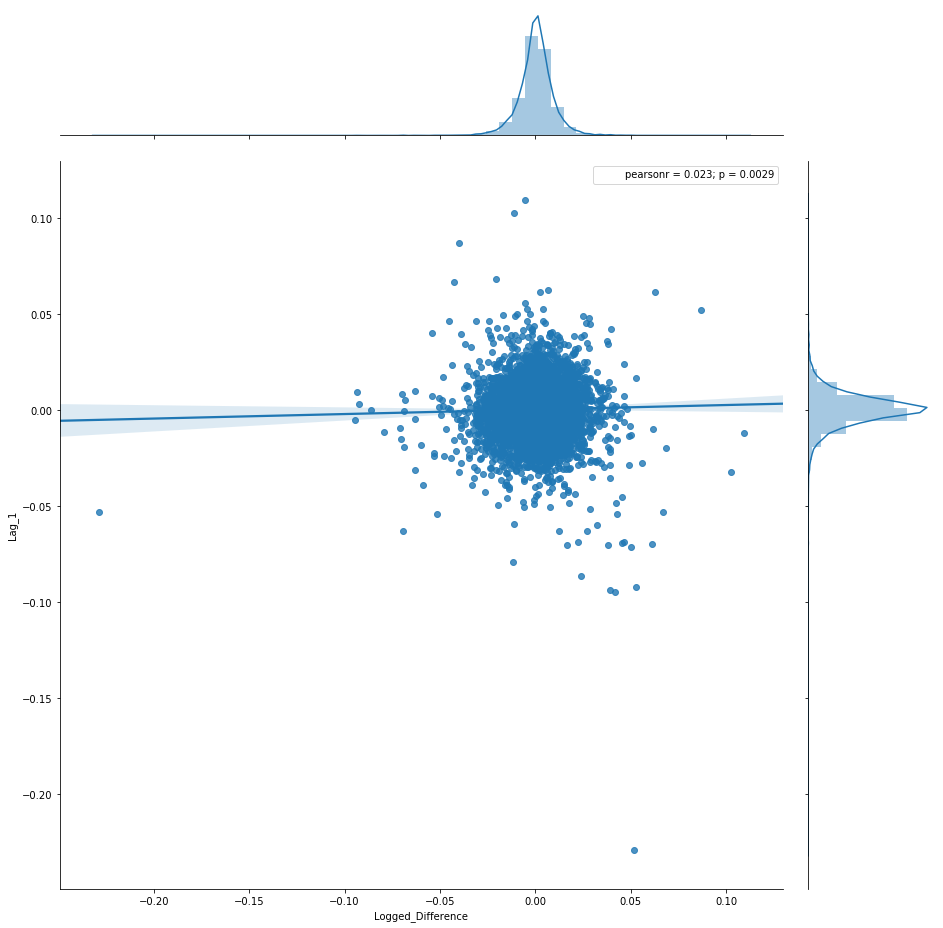

In [13]:
sns.jointplot('Logged_Difference', 'Lag_1', df, kind='reg', size=13);

Notice how tightly packed the mass is around 0. It also appears to be pretty evenly distributed - the marginal distributions on both axes are roughly normal. This seems to indicate that knowing the index value one day doesn't tell us much about what it will do the next day.